In [ ]:
from google.colab import drive
from google.colab import files

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/diabetes (3).csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and summary statistics
data.head(), data.describe(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3                     0.167   21        0  
 4                     2.288   33        1  ,
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
 count   768.000000  768.000000     768.000000     768.000000  768.000000   
 mean      3.845052  120.894531      69.105469      20.536458   79.799479   
 std       3.369578   31.972618      19.355807      15.952

In [ ]:
import numpy as np

# Columns where zero is not a plausible value
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zero values with NaN
data[columns_to_check] = data[columns_to_check].replace(0, np.nan)

# Display the updated dataset info and first few rows to check changes
data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


(None,
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6    148.0           72.0           35.0      NaN  33.6   
 1            1     85.0           66.0           29.0      NaN  26.6   
 2            8    183.0           64.0            NaN      NaN  23.3   
 3            1     89.0           66.0           23.0     94.0  28.1   
 4            0    137.0           40.0           35.0    168.0  43.1   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3                     0.167   21        0  
 4                     2.288   33        1  )

In [ ]:
# Impute missing values with median
for column in columns_to_check:
    median_value = data[column].median()
    data.fillna({column: median_value}, inplace=True)


# Verify that there are no missing values left
data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


(None,
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6    148.0           72.0           35.0    125.0  33.6   
 1            1     85.0           66.0           29.0    125.0  26.6   
 2            8    183.0           64.0           29.0    125.0  23.3   
 3            1     89.0           66.0           23.0     94.0  28.1   
 4            0    137.0           40.0           35.0    168.0  43.1   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3                     0.167   21        0  
 4                     2.288   33        1  )

In [ ]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')

# Remove duplicates if any
data_cleaned = data.drop_duplicates()

# Verify the dataset
print(data_cleaned.info())

Number of duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
None


In [ ]:
# Save the cleaned dataset to a new CSV file
data_cleaned.to_csv('cleaned_diabetes.csv', index=False)
# data_cleaned.to_csv("\content\drive\MyDrive\data.csv")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# render the plot inline, instead of in a separate window
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/cleaned_diabetes.csv")

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1
767,1,93.0,70.0,31.0,125.0,30.4,0.315,23,0


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [ ]:
data.isna().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
data.duplicated()


,0
0,False
1,False
2,False
3,False
4,False
...,...
763,False
764,False
765,False
766,False


In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

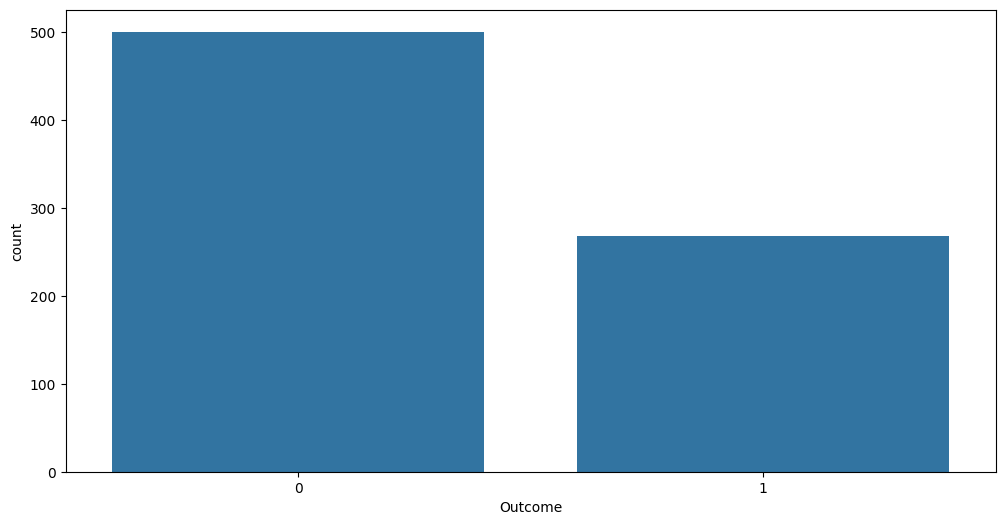

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Outcome', data = data)
plt.show()

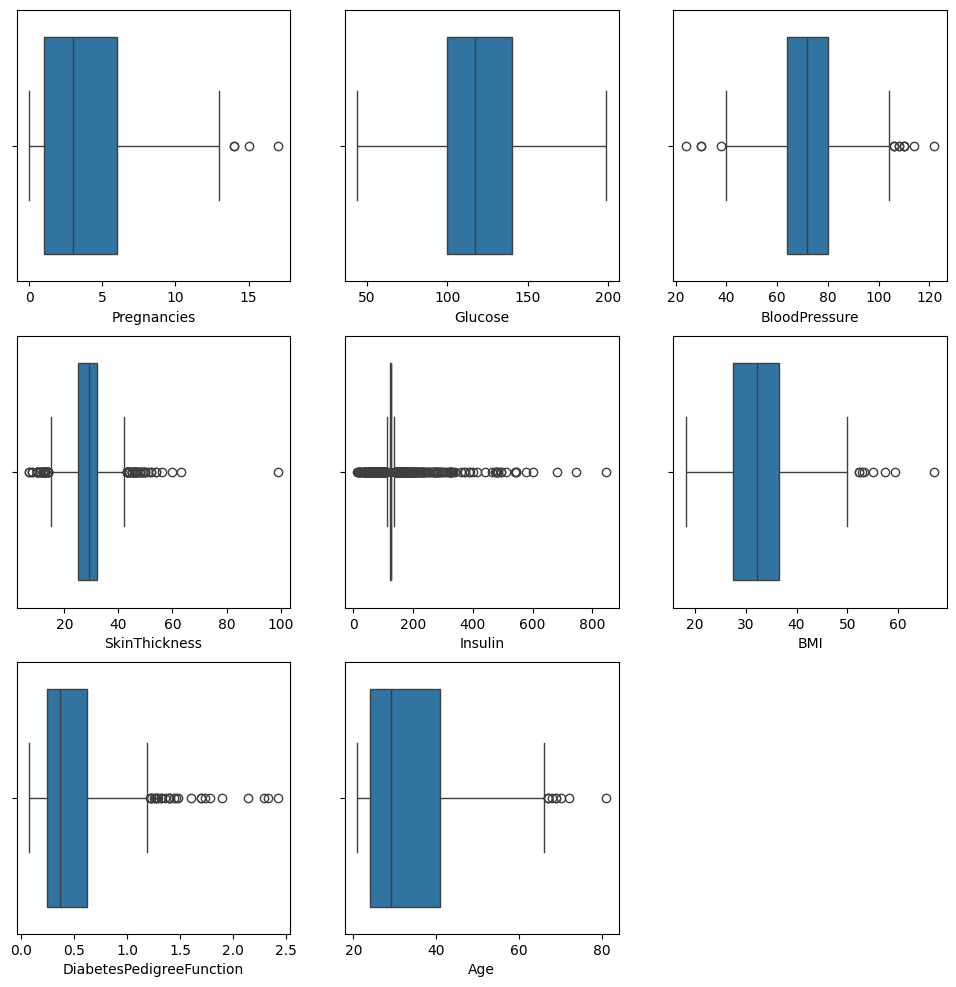

In [ ]:
plt.figure(figsize=(12,12))
for i,col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = col, data = data)
plt.show()

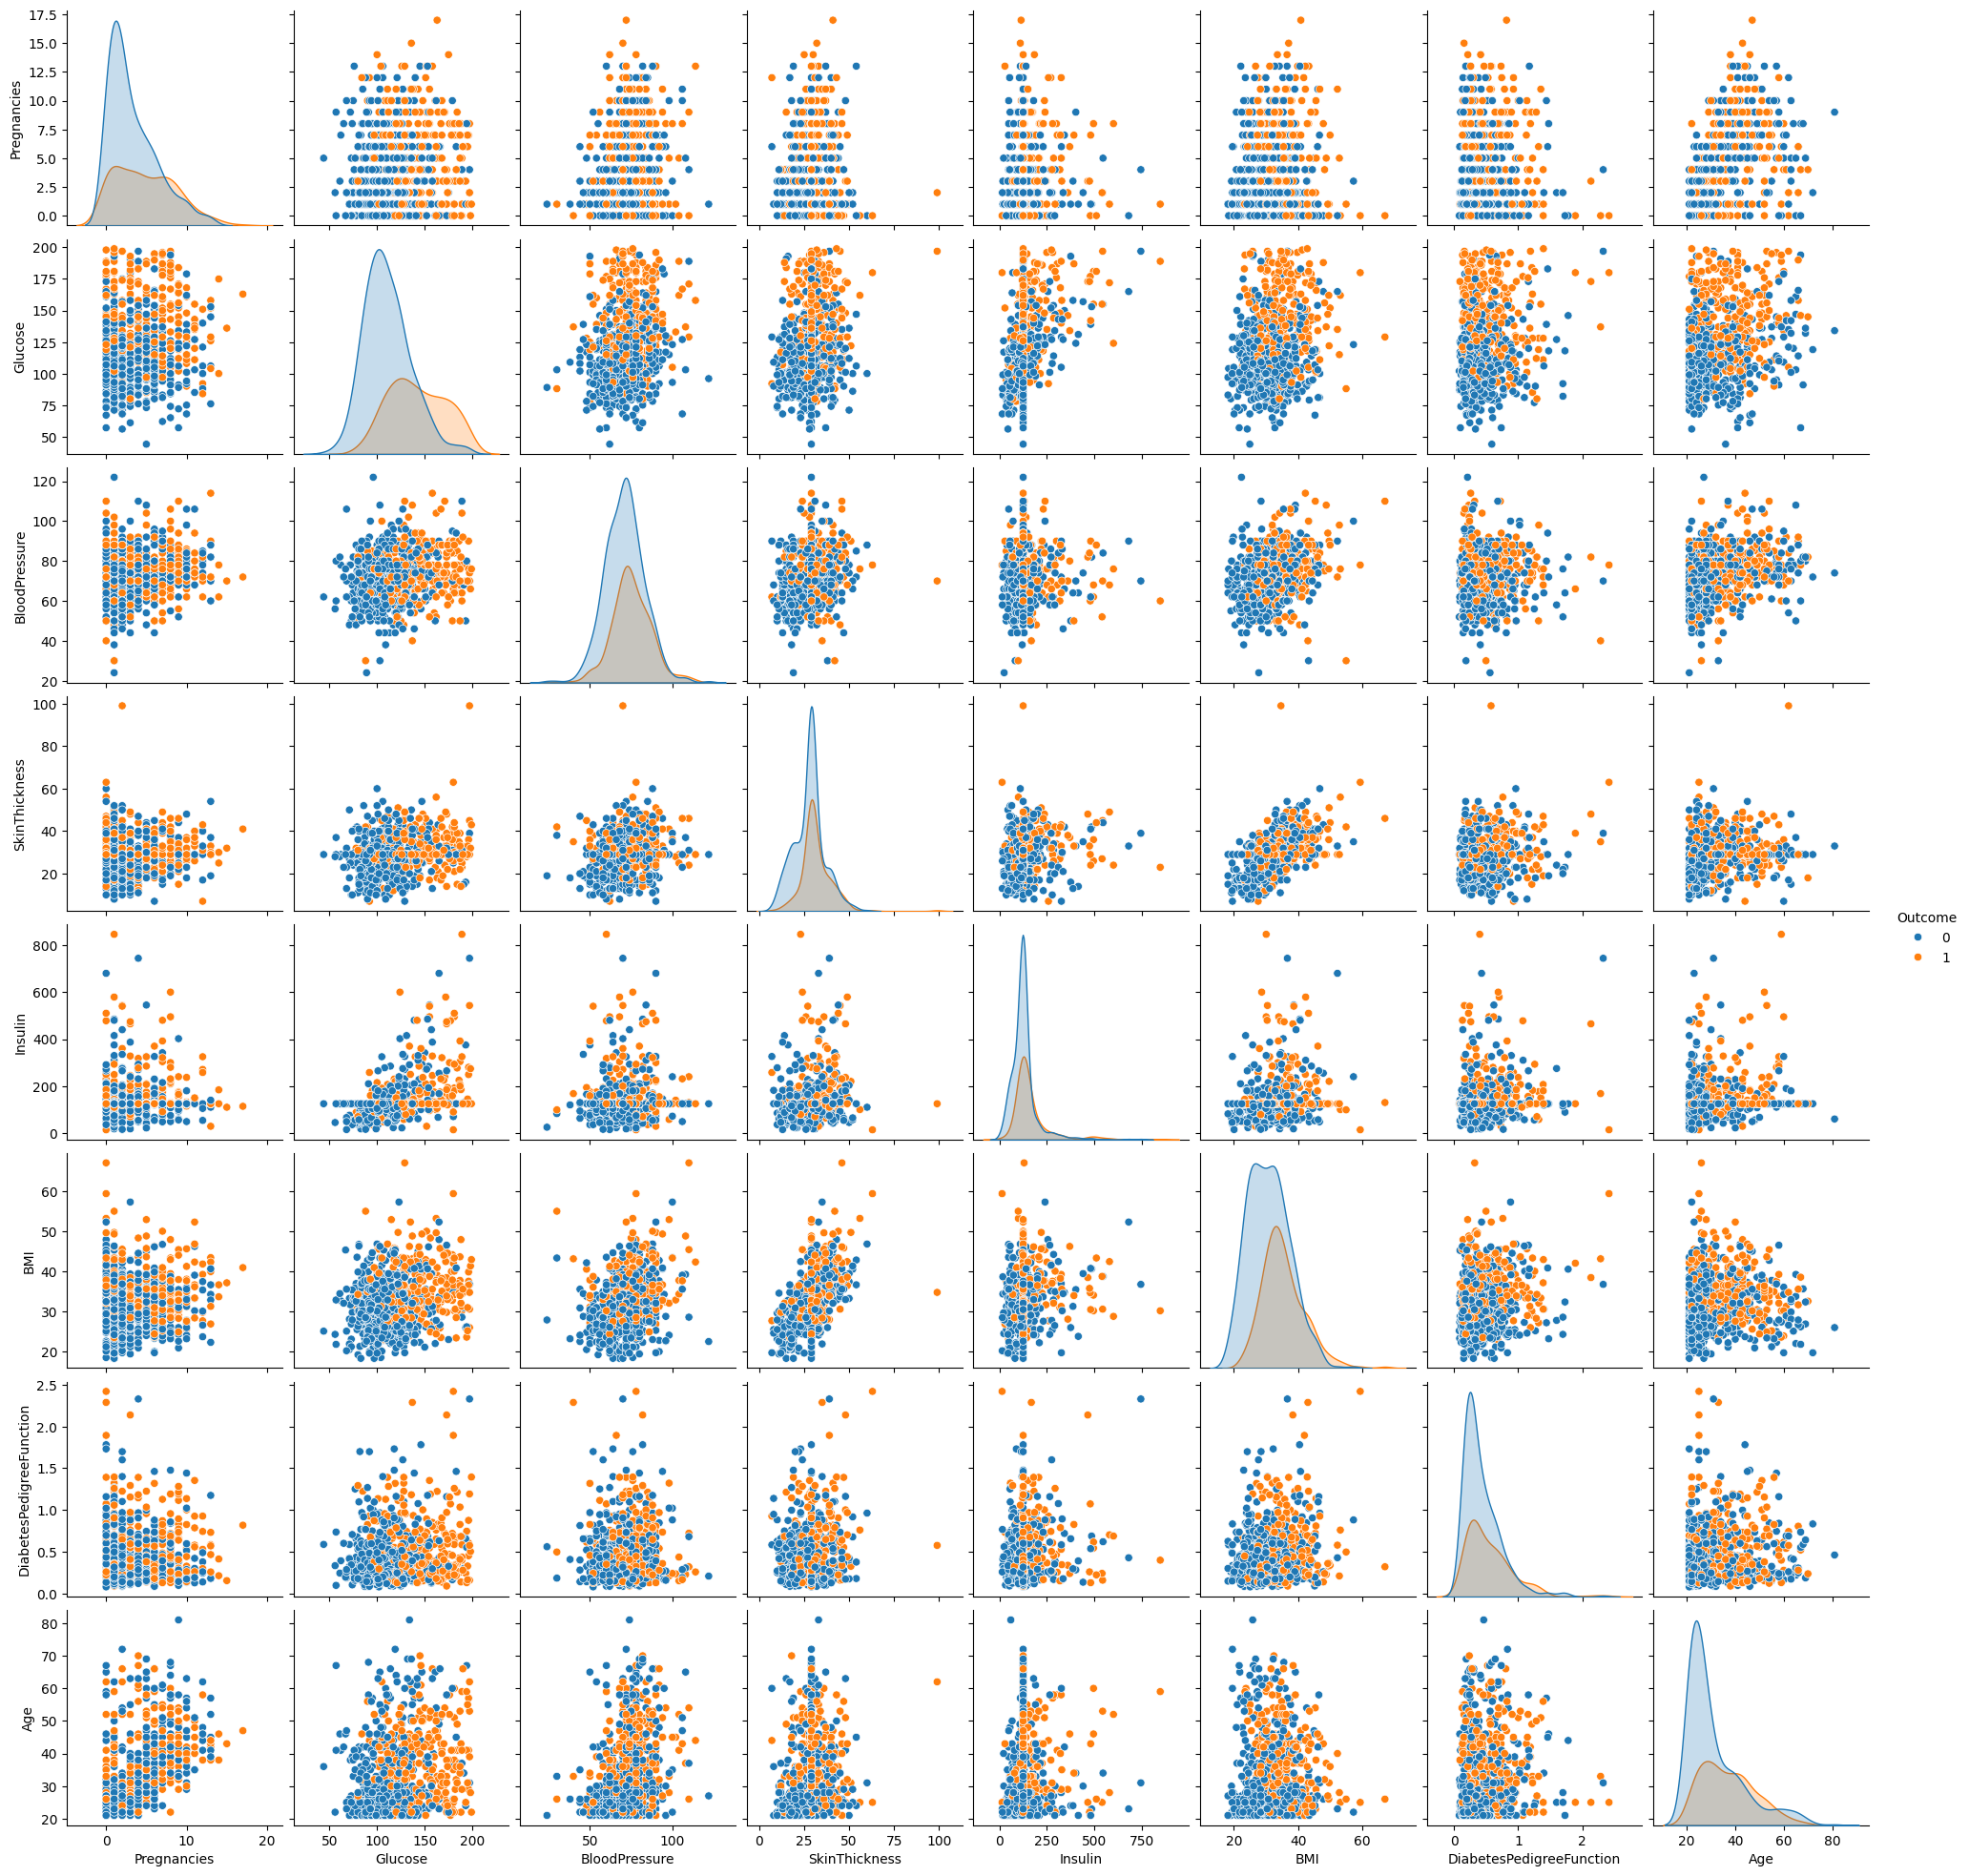

In [ ]:
sns.pairplot(data, hue= 'Outcome')
plt.show()

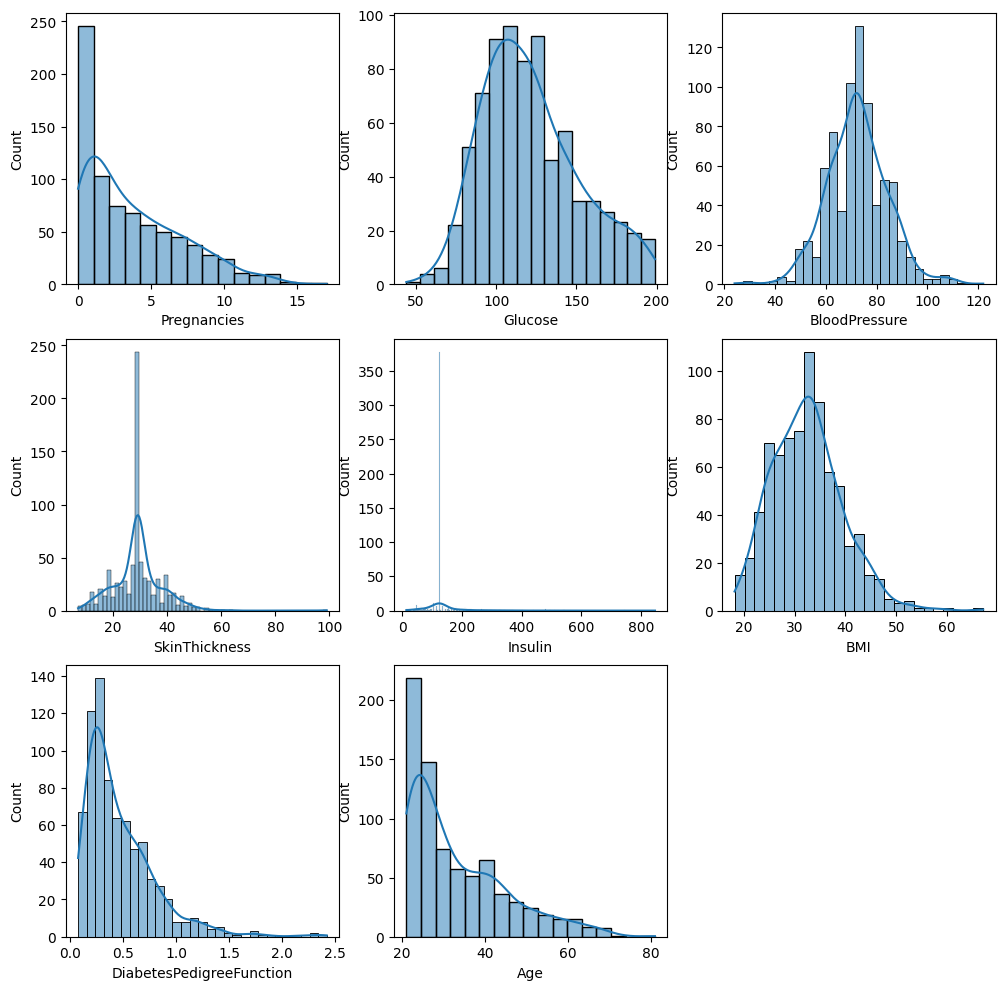

In [ ]:
plt.figure(figsize= (12,12))
for i,col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(3,3,i+1)
    sns.histplot(x = col, data = data, kde = True)
plt.show()


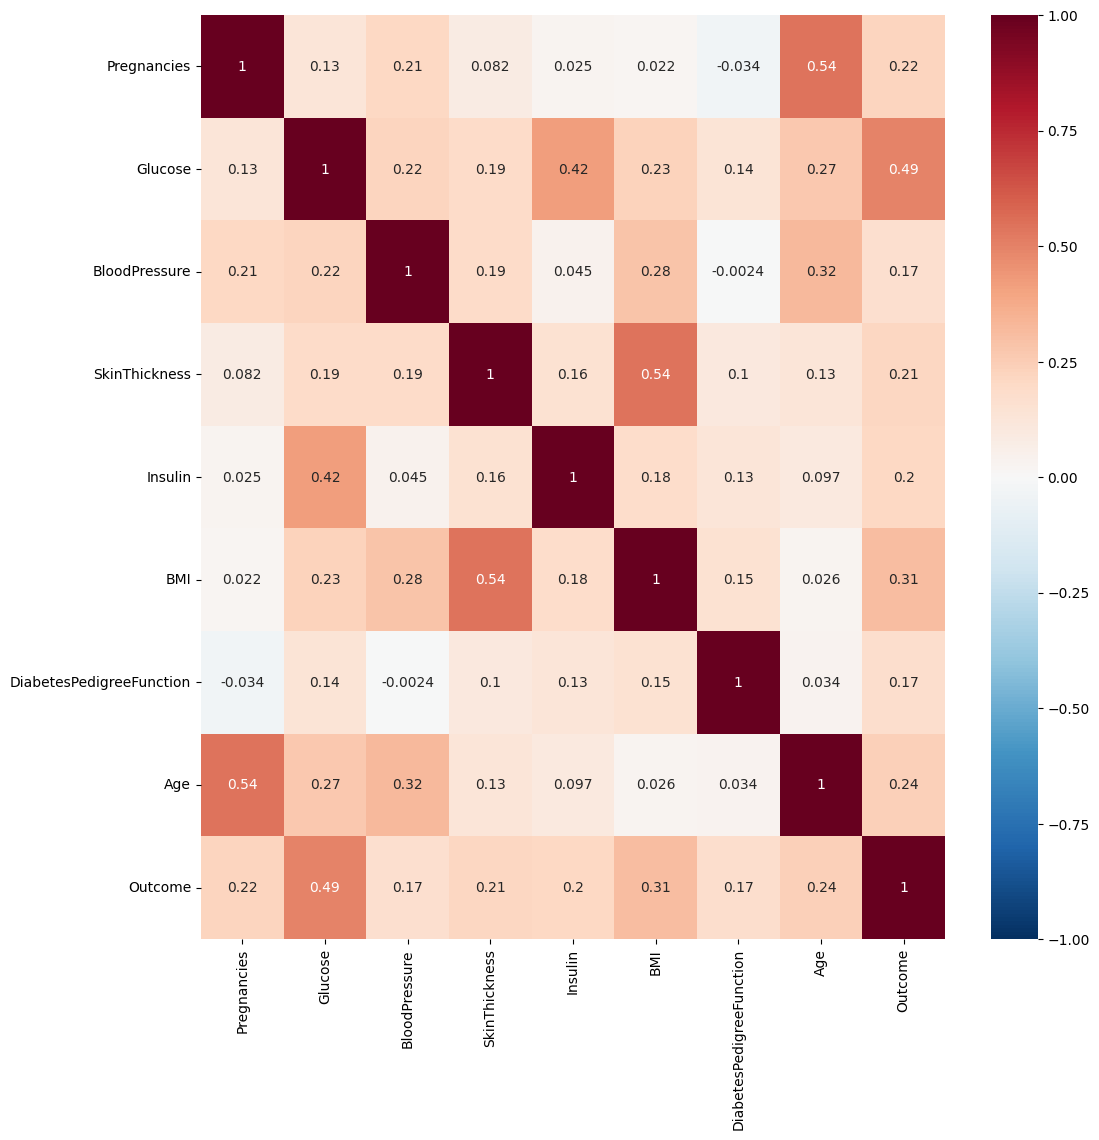

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),vmin = -1.0, center = 0,cmap ='RdBu_r', annot = True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(data.drop(['Outcome'],axis = 1),),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496


In [ ]:
y = data['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)

    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
max_train_score = max(train_scores)
train_scores_index = [i for i, v in enumerate(train_scores) if v == max_train_score]
print("Max train score is {} % and k = {}".format(max_train_score * 100, list(map(lambda x: x + 1, train_scores_index))))



Max train score is 100.0 % and k = [1]


In [ ]:
max_test_score = max(test_scores)
test_scores_index = [i for i, v in enumerate(test_scores) if v == max_test_score]
print("Max test score is {} % and k = {}".format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_index))))

Max test score is 80.51948051948052 % and k = [9]


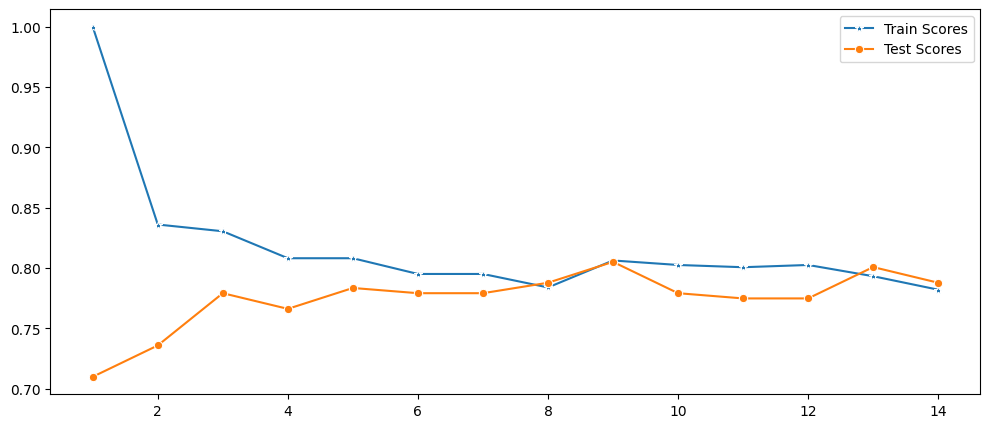

In [ ]:
plt.figure(figsize=(12, 5))
p = sns.lineplot(x=range(1, 15), y=train_scores, marker='*', label='Train Scores')
p = sns.lineplot(x=range(1, 15), y=test_scores, marker='o', label='Test Scores')

In [ ]:
knn = KNeighborsClassifier(13)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)*100

80.08658008658008

In [ ]:
from sklearn.metrics import confusion_matrix
y_predict = knn.predict(X_test)
confusion_matrix(y_test, y_predict)

array([[141,  16],
       [ 30,  44]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       157
           1       0.73      0.59      0.66        74

    accuracy                           0.80       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.80      0.80      0.79       231



In [ ]:
from sklearn.model_selection import train_test_split

feature_col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
predicted_class_names = ['Outcome']

X = data[feature_col_names].values # these are factors for the prediction
y = data[predicted_class_names].values # this is what we want to predict

split_test_size = 0.3

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = split_test_size,random_state=42)

In [ ]:
print("{0:0.2f}% in training set".format((len(X_train)/len(data.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(data.index)) * 100))

69.92% in training set
30.08% in test set


In [ ]:
print("Original True  : {0} ({1:0.2f}%)".format(len(data.loc[data['Outcome'] == 1]), (len(data.loc[data['Outcome'] == 1])/len(data.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(data.loc[data['Outcome'] == 0]), (len(data.loc[data['Outcome'] == 0])/len(data.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 188 (35.01%)
Training False : 349 (64.99%)

Test True      : 80 (34.63%)
Test False     : 151 (65.37%)


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
print("# rows in dataframe {0}".format(len(data)))
print("# rows missing Glucose: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("# rows missing BloodPressure: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("# rows missing SkinThickness: {0}".format(len(data.loc[data['SkinThickness'] == 0])))
print("# rows missing Insulin: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("# rows missing BMI: {0}".format(len(data.loc[data['BMI'] == 0])))
print("# rows missing DiabetesPedigreeFunction: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("# rows missing Age: {0}".format(len(data.loc[data['Age'] == 0])))

# rows in dataframe 768
# rows missing Glucose: 0
# rows missing BloodPressure: 0
# rows missing SkinThickness: 0
# rows missing Insulin: 0
# rows missing BMI: 0
# rows missing DiabetesPedigreeFunction: 0
# rows missing Age: 0


In [ ]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB()

In [ ]:
# predict values using training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library from scikit learn
from sklearn import metrics

# check naive bayes model's accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train,nb_predict_train)))
print()

Accuracy: 0.7542



In [ ]:
nb_predict_test=nb_model.predict(X_test)

from sklearn import metrics

print("Accuracy:{0:.4f}".format(metrics.accuracy_score(y_test,nb_predict_test)))

Accuracy:0.7403


In [ ]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test,nb_predict_test)))
print("")

Confusion Matrix
[[119  32]
 [ 28  52]]



In [ ]:
print("Classification Report")
print("{0}".format(metrics.classification_report(y_test,nb_predict_test)))

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(bootstrap=True,
    criterion='gini',
    max_depth=None,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=10,
    n_jobs=-1,  # Use all processors
    oob_score=False,
    random_state=42,
    verbose=0,
    warm_start=False)
rf_model.fit(X_train,y_train.ravel())

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [ ]:
rf_predict_train = rf_model.predict(X_train)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train,rf_predict_train)))
print()

Accuracy: 0.9870



In [ ]:
rf_predict_test = rf_model.predict(X_test)
print("Accuracy:{0:.4f}".format(metrics.accuracy_score(y_test,rf_predict_test)))
print()

Accuracy:0.7316



In [ ]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, rf_predict_test) )
print("")

Confusion Matrix
[[122  29]
 [ 33  47]]



In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.62      0.59      0.60        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

# Ensure y_train is a 1D array
y_train = y_train.ravel()

# Create a pipeline that first scales the data and then applies logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=200))

# Fit the model
pipeline.fit(X_train, y_train)

# Ensure y_test is a 1D array
y_test = y_test.ravel()

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7402597402597403
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



1st max value of 0.618 occurred at C=0.100


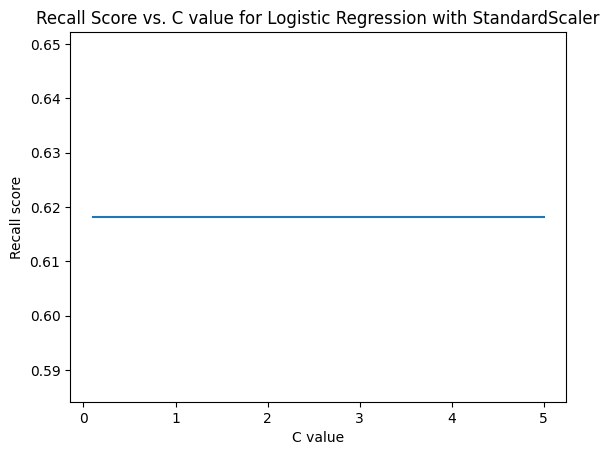

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("/content/cleaned_diabetes.csv")

# Assuming the target column is named 'Outcome' and the rest are features
X = data.drop(columns='Outcome')
y = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize parameters for logistic regression regularization
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while C_val < C_end:
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42)
    lr_model_loop.fit(X_train_scaled, y_train)  # Fit with scaled training data
    lr_predict_loop_test = lr_model_loop.predict(X_test_scaled)  # Predict with scaled test data
    recall = recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall)
    if recall > best_recall_score:
        best_recall_score = recall
        best_lr_predict_test = lr_predict_loop_test

    C_val += C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occurred at C={1:.3f}".format(best_recall_score, best_score_C_val))

# Plot the changes in C-values against recall scores to see how the regularization scores impact the recall score
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("Recall score")
plt.title("Recall Score vs. C value for Logistic Regression with StandardScaler")
plt.show()

1st max value of 0.709 occurred at C=0.100


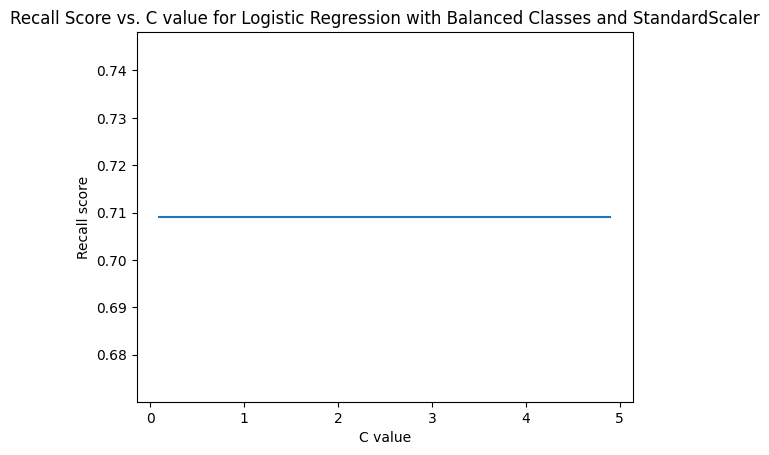

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv("/content/cleaned_diabetes.csv")

# Assuming the target column is named 'Outcome' and the rest are features
X = data.drop(columns='Outcome')
y = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize parameters for logistic regression regularization
C_start = 0.1
C_end = 5.0
C_inc = 0.1

C_values = np.arange(C_start, C_end, C_inc)
recall_scores = []

best_recall_score = 0
best_lr_predict_test = None
best_score_C_val = C_start

# Initialize StandardScaler
scaler = StandardScaler()

for C_val in C_values:
    # Fit and transform scaler on X_train
    X_train_scaled = scaler.fit_transform(X_train)
    # Transform X_test using the scaler fitted on X_train
    X_test_scaled = scaler.transform(X_test)

    # Create and train logistic regression model with balanced class weights
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42)
    lr_model_loop.fit(X_train_scaled, y_train)

    # Predict on X_test_scaled
    lr_predict_loop_test = lr_model_loop.predict(X_test_scaled)

    # Calculate recall score
    recall = recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall)

    # Track best recall score and corresponding parameters
    if recall > best_recall_score:
        best_recall_score = recall
        best_lr_predict_test = lr_predict_loop_test
        best_score_C_val = C_val

print("1st max value of {0:.3f} occurred at C={1:.3f}".format(best_recall_score, best_score_C_val))

# Plot the changes in C-values against recall scores to visualize the impact of regularization
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("Recall score")
plt.title("Recall Score vs. C value for Logistic Regression with Balanced Classes and StandardScaler")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create logistic regression model with balanced class weights and increased max_iter
lr_model = LogisticRegression(class_weight="balanced", C=best_score_C_val, random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

lr_predict_test = lr_model.predict(X_test)

# Training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))
print("Recall Score :{}".format(metrics.recall_score(y_test, lr_predict_test)))

Accuracy: 0.7078
[[70 29]
 [16 39]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.71      0.76        99
           1       0.57      0.71      0.63        55

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.73      0.71      0.71       154

Recall Score :0.7090909090909091


In [ ]:
from joblib import dump,load

In [ ]:
dump()